In [ ]:
#!pip autogluon
#!pip install autogluon.eda

# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import sklearn.impute
import IPython
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")
submission = pd.read_csv("/content/sample_submission.csv")

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [ ]:
import autogluon.eda.auto as auto
from autogluon.tabular import TabularPredictor
from autogluon.common import space

# 전처리

In [ ]:
df_train # (1)값이 0인 데이터들을 전처리 해줘야 할 것 같음..

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,0,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0


<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='BMI'>

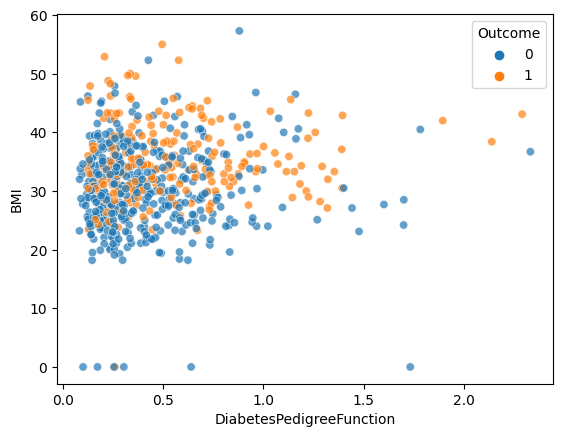

In [ ]:
sns.scatterplot(
    df_train,
    x='DiabetesPedigreeFunction',
    y='BMI',
    hue='Outcome',
    alpha=0.7
)
# 이상치들이 많다.. 'DiabetesPedigreeFunction' 가 1.5이상이면 0.5쯤으로 치환해보자..

## 그리드 서치를 이용한 하이퍼파라메타 수정

In [ ]:
# Extract features and target variable
X = pd.get_dummies(X_train_sclaed2.loc[:,'Pregnancies':'Age'])
y = X_train_sclaed2[['Outcome']]

# Define the logistic regression model
logistic_reg = LogisticRegression()

# StratifiedKFold를 사용하여 데이터를 분할
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Create GridSearchCV object
grid_search = GridSearchCV(logistic_reg, param_grid, cv=cv, scoring='accuracy')

# Fit GridSearchCV to data
grid_search.fit(X, y)

# Extract best estimator and its score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best parameters:", grid_search.best_params_)
print("Best score:", best_score)

## 변수 설정

No path specified. Models will be saved in: "AutogluonModels/ag-20240321_070806/"


### Model Prediction for Outcome

Using validation data for `Test` points

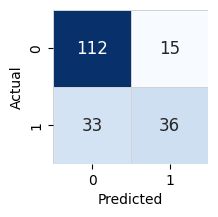

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.755102,0.793478,0.003299,0.003121,0.363972,0.003299,0.003121,0.363972,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
Glucose,1.163265e-01,0.015890,0.000041,5,0.149045,0.083608
BMI,1.224490e-02,0.015972,0.080814,5,0.045131,-0.020641
Pregnancies,1.020408e-02,0.013008,0.077136,5,0.036987,-0.016579
BloodPressure,5.102041e-03,0.003608,0.017055,5,0.012530,-0.002326
SkinThickness,1.020408e-03,0.004269,0.310654,5,0.009810,-0.007769
Insulin,1.020408e-03,0.010456,0.418970,5,0.022550,-0.020509
Age,-4.440892e-17,0.006249,0.500000,5,0.012866,-0.012866
DiabetesPedigreeFunction,-5.102041e-03,0.024469,0.667353,5,0.045279,-0.055483


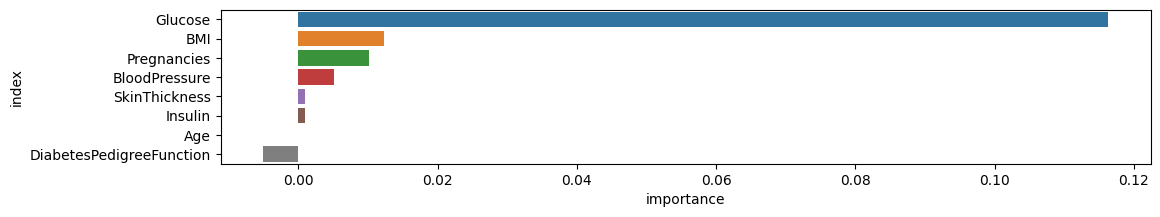

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,0,1,error
5,-0.518286,-1.431480,-1.887832,0.328284,-0.800806,-0.193986,-0.705937,-0.635655,1,0.906169,0.093831,0.812337
477,0.000000,-0.579660,-0.698307,0.906640,-1.075827,0.195752,0.229493,-0.974186,1,0.870545,0.129455,0.741090
567,0.000000,-0.481373,-0.868239,0.096941,-0.961235,0.645451,1.111368,-0.720288,1,0.805917,0.194083,0.611834
379,-0.518286,-0.022701,-1.717900,0.000000,0.000000,0.555511,-1.137948,-0.720288,1,0.749880,0.250120,0.499760
210,2.535578,-1.234906,-0.018578,0.212612,0.000000,-0.388855,-0.530990,1.057002,1,0.742102,0.257898,0.484204
246,-0.178968,-0.415849,-0.698307,1.716339,-0.674755,0.375632,1.639779,-0.635655,1,0.735923,0.264077,0.471846
211,0.499669,-0.645185,0.831083,0.000000,0.000000,-0.223966,-0.948720,0.210673,1,0.726287,0.273712,0.452575
309,-0.518286,0.272160,0.491219,-0.712758,-0.903939,-0.583725,-0.438161,0.041408,1,0.725646,0.274354,0.451293
292,-0.178968,0.403209,-0.018578,0.000000,0.000000,-1.273262,-0.602397,2.241861,1,0.714604,0.285396,0.429209
354,-1.196923,-0.219275,-0.188510,0.096941,-0.709132,0.345652,0.297330,-0.127858,1,0.709893,0.290107,0.419787


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,0,1,error
611,-0.178968,-0.055463,-0.358442,0.000000,0.000000,-0.403845,0.939991,0.041408,0,0.491737,0.508263,0.016526
368,-0.178968,0.665307,1.170947,0.000000,0.000000,1.754706,0.711489,-0.974186,1,0.508290,0.491710,0.016580
92,1.856942,0.567020,0.661151,0.000000,0.000000,-0.778594,3.553483,1.987963,0,0.481925,0.518075,0.036150
372,0.499669,2.368946,0.491219,0.000000,0.000000,-1.318232,-1.130808,2.157229,1,0.519181,0.480819,0.038361
25,-1.196923,0.894643,-0.358442,-0.018730,-0.353897,-0.448815,-0.345332,0.718470,1,0.524848,0.475152,0.049697
217,1.856942,1.320553,1.001015,0.000000,0.000000,-0.688654,-0.941579,1.734064,0,0.472799,0.527201,0.054402
145,-0.178968,0.960168,1.510812,1.022311,0.000000,-0.388855,-0.541701,0.210673,0,0.471797,0.528203,0.056407
434,-0.857604,-0.415849,1.680744,0.000000,0.000000,1.559837,1.425558,1.734064,0,0.471443,0.528557,0.057113
496,-0.518286,1.910274,-0.698307,-0.481415,-1.007072,0.255712,-0.623819,-0.635655,0,0.466142,0.533858,0.067716
214,0.838987,-0.252037,-0.698307,0.000000,0.000000,-0.733624,1.022109,0.041408,1,0.534523,0.465477,0.069045


In [ ]:
auto.quick_fit(
    train_data=X_train_sclaed2,
    label='Outcome',
    show_feature_importance_barplots=True
)

### GPT한테도 물어보자..
**나이 (Age)**: 나이는 당뇨병 발병 위험에 중요한 영향을 미칩니다. 일반적으로 나이가 들면 인슐린 저항성이 증가하고, 신체의 대사 활동이 감소함에 따라 당뇨병 발병 위험이 증가합니다.

**당뇨 혈통 기능 (Diabetes Pedigree Function)**: 이것은 당뇨병과 관련된 가족력을 나타냅니다. 당뇨병은 유전적 요인이 상당한 영향을 미칩니다. 가족 중에서 당뇨병이 있는 경우, 해당 개인의 당뇨병 발병 위험이 증가할 수 있습니다.

# 최종코드

In [ ]:
# 전처리
## (1) 0값 치환
imputer = SimpleImputer(missing_values=0, strategy='mean')
df_train_2 = imputer.fit_transform(df_train.loc[:,'Pregnancies':'Age'])
df_test_2 = imputer.fit_transform(df_test.loc[:,'Pregnancies':'Age'])
df_train_imputed = pd.DataFrame(df_train_2, columns=df_train.loc[:,'Pregnancies':'Age'].columns)
df_train_imputed['Outcome'] = df_train['Outcome']
df_test_2_imputed = pd.DataFrame(df_test_2, columns=df_test.loc[:,'Pregnancies':'Age'].columns)

## (2) 이상치 변환
df_train_imputed.loc[df_train_imputed['DiabetesPedigreeFunction'] > 1.5, 'DiabetesPedigreeFunction'] = 0.5
df_test_2_imputed.loc[df_test_2_imputed['DiabetesPedigreeFunction'] > 1.5, 'DiabetesPedigreeFunction'] = 0.5

## (3) 스케일 조정
scaler = StandardScaler()
X_train_sclaed = scaler.fit_transform(df_train_imputed.loc[:,'Pregnancies':'Age'])
X_train_sclaed2 = pd.DataFrame(X_train_sclaed, columns=df_train.loc[:,'Pregnancies':'Age'].columns) #
X_train_sclaed2['Outcome'] = df_train['Outcome']

df_test_2_imputed2 = scaler.transform(df_test_2_imputed)
df_test_2_imputed3 = pd.DataFrame(df_test_2_imputed2, columns=df_test.loc[:,'Pregnancies':'Age'].columns) #

#----------
X = pd.get_dummies(X_train_sclaed2.loc[:,['Glucose','BMI','Age','DiabetesPedigreeFunction']])
y = X_train_sclaed2[['Outcome']]
predictr = sklearn.linear_model.LogisticRegression(solver='newton-cg',C=0.1,max_iter=100)
predictr.fit(X,y)
predictr.score(X,y)

0.7714723926380368

# 제출

In [ ]:
XX = pd.get_dummies(df_test_2_imputed3.loc[:,['DiabetesPedigreeFunction','BMI','Age','Glucose','BloodPressure']])
submission.assign(Outcome = predictr.predict(XX)).to_csv('Submission_samsip',index=False)